# 线性回归pytorch
## 1)设计模型： Design model (input, output, forward pass with different layers)   
## 2) 构建损失函数与优化器：Construct loss and optimizer
## 3) 循环：Training loop
## &emsp;&emsp;&emsp;&emsp;- Forward = compute prediction and loss
## &emsp;&emsp;&emsp;&emsp;- Backward = compute gradients
## &emsp;&emsp;&emsp;&emsp;- Update weights
##  &emsp;&emsp;&emsp;&emsp;Test loop
##  &emsp;&emsp;&emsp;&emsp;- Forward = compute prediction and loss

In [28]:
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"

## 构造训练和测试数据

In [29]:
X_train = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)  
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)

noise = np.random.randn(256) / 4

X_train

n_samples, n_features = X_train.shape

## 搭建模型 & 实例化

In [30]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

model = LinearRegression(n_features, n_features).to(device)
print(model)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## 优化

In [31]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 训练

In [32]:
def train(X_train, Y, model, loss_fn, optimizer):
    model.train()
    n_iter = 200
    for epoch in range(n_iter):
        X_train, Y = X_train.to(device), Y.to(device)
        pred = model(X_train)
        loss = loss_fn(pred, Y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            [w, b] = model.parameters()
            print('epoch',epoch+1, 'loss=',loss.item())

train(X_train, Y, model, loss_fn, optimizer)

epoch 1 loss= 26.281768798828125
epoch 11 loss= 0.8074555993080139
epoch 21 loss= 0.14095398783683777
epoch 31 loss= 0.11672164499759674
epoch 41 loss= 0.10951313376426697
epoch 51 loss= 0.10312822461128235
epoch 61 loss= 0.09712530672550201
epoch 71 loss= 0.0914720818400383
epoch 81 loss= 0.0861479640007019
epoch 91 loss= 0.08113371580839157
epoch 101 loss= 0.07641132175922394
epoch 111 loss= 0.07196377962827682
epoch 121 loss= 0.06777507811784744
epoch 131 loss= 0.06383026391267776
epoch 141 loss= 0.06011499837040901
epoch 151 loss= 0.05661600083112717
epoch 161 loss= 0.05332063138484955
epoch 171 loss= 0.050217077136039734
epoch 181 loss= 0.04729422926902771
epoch 191 loss= 0.04454141855239868


## 测试

In [37]:
def test(X_test, model):
    model.eval()
    print('pred_y:',model(X_test).item())
test(X_test, model)

pred_y: 9.64887523651123


## 绘图

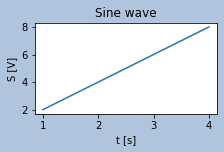

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x = X_train
y = Y

fig, ax = plt.subplots(figsize=(3,2), constrained_layout=True)
ax.plot(x, y)
ax.set_xlabel('t [s]')
ax.set_ylabel('S [V]')
ax.set_title('Sine wave')
fig.set_facecolor('lightsteelblue')